# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
import urllib.request

Les données sont disponibles sur le site Web du [Réseau Sentinelles](https://www.sentiweb.fr/).

Recuperation des données à partir du site si aucun jeu de données est trouvé localement.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"
local_file = "inc-7-PAY.csv"

if not os.path.exists(local_file):
    print("No local copy. Downloading from " + data_url)
    urllib.request.urlretrieve(data_url, local_file)

No local copy. Downloading from https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv


Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(local_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202517          7   6022     2798    9246       9           4   
1     202516          7   6184     3188    9180       9           5   
2     202515          7   5557     3262    7852       8           5   
3     202514          7   4984     2858    7110       7           4   
4     202513          7   5964     3608    8320       9           5   
5     202512          7   3855     1995    5715       6           3   
6     202511          7   5878     2747    9009       9           4   
7     202510          7   2921     1421    4421       4           2   
8     202509          7   3381     1468    5294       5           2   
9     202508          7   2835     1286    4384       4           2   
10    202507          7   4502     2382    6622       7           4   
11    202506          7   3455     1958    4952       5           3   
12    202505          7   2087     1056    3118       3           1   
13    202504          7   6895     4466    9324      10           6   
14    202503          7   2462     1161    3763       4           2   
15    202502          7   5966     2757    9175       9           4   
16    202501          7   6059     2451    9667       9           4   
17    202452          7   4356     1776    6936       7           3   
18    202451          7   4670     2239    7101       7           3   
19    202450          7   7363     4438   10288      11           7   
20    202449          7   6077     3631    8523       9           5   
21    202448          7   4189     1454    6924       6           2   
22    202447          7   1931      726    3136       3           1   
23    202446          7   2260      863    3657       3           1   
24    202445          7   2713     1216    4210       4           2   
25    202444          7   2135      676    3594       3           1   
26    202443          7   2124      641    3607       3           1   
27    202442          7   2621     1246    3996       4           2   
28    202441          7   2035      381    3689       3           1   
29    202440          7   2125      725    3525       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1765  199126          7  17608    11304   23912      31          20   
1766  199125          7  16169    10700   21638      28          18   
1767  199124          7  16171    10071   22271      28          17   
1768  199123          7  11947     7671   16223      21          13   
1769  199122          7  15452     9953   20951      27          17   
1770  199121          7  14903     8975   20831      26          16   
1771  199120          7  19053    12742   25364      34          23   
1772  199119          7  16739    11246   22232      29          19   
1773  199118          7  21385    13882   28888      38          25   
1774  199117          7  13462     8877   18047      24          16   
1775  199116          7  14857    10068   19646      26          18   
1776  199115          7  13975     9781   18169      25          18   
1777  199114          7  12265     7684   16846      22          14   
1778  199113          7   9567     6041   13093      17          11   
1779  199112          7  10864     7331   14397      19          13   
1780  199111          7  15574    11184   19964      27          19   
1781  199110          7  16643    11372   21914      29          20   
1782  199109          7  13741     8780   18702      24          15   
1783  199108          7  13289     8813   17765      23          15   
1784  199107          7  12337     8077   16597      22          15   
1785  199106          7  10877     7013   14741      19          12   
1786  199105          7  10442     6544   14340      18          11   
1787  199104          7   7913     4563   11263      14           8   
1788  199103          7  15387    10484   20290      27          18   
1789  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquante pour une semaine dans ce jeu de donnée.
Donc pas besoin de supprimer de ligne.

In [8]:
data = raw_data

Conversion de la representaion des semaine à un format interpretable par pandas.

In [9]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

tri des données dans l'ordre croissant.

In [10]:
sorted_data = data.set_index('period').sort_index()

Vérification de la continuité des donnée. Ici aucun problème.

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Conversion des valeurs de la colone 'inc' en int si ce n'est pas déjà le cas.

In [13]:
sorted_data['inc'] = [int(inc) for inc in sorted_data['inc']]

Premiere visualisation des données.

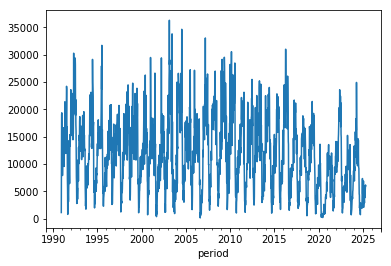

In [14]:
sorted_data['inc'].plot()

# Etude de l'incidence annuelle

Définition de l'année comme la periode entre le premier jour de la semaine qui contient le 1er août de chaque année.

In [16]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

Extraction des donnée annuelle et verification du nombre de semaine

In [18]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Graph des incidence annuelle.

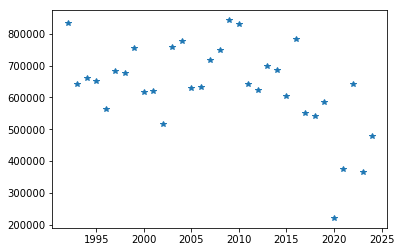

In [19]:
yearly_incidence.plot(style='*')

tri des valeur annuelle

In [20]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2024    479258
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64